In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
plt.rcParams.update({"font.size": 24})
plt.rcParams["figure.dpi"] = 600
plt.rcParams["figure.figsize"] = [15,15]
plt.rcParams['lines.linewidth'] = 0.9

In [3]:
rho_axon=7e-3
r_axon=1e-6
l_axon=3e-6
A_axon=np.pi*r_axon**2
R_a=(rho_axon * l_axon)/A_axon
C_m =1e-6
print(f"Axon resistance: {R_a}")
num_axons=100
t_end  =	30e-3
dt     =	25e-6
T1     =    6.3
t = np.arange(0, t_end + dt, dt)
def temp_corr(T):
    k=3**(0.1*(T-6.3))
    return k

Axon resistance: 6684.507609859605


(3001,)


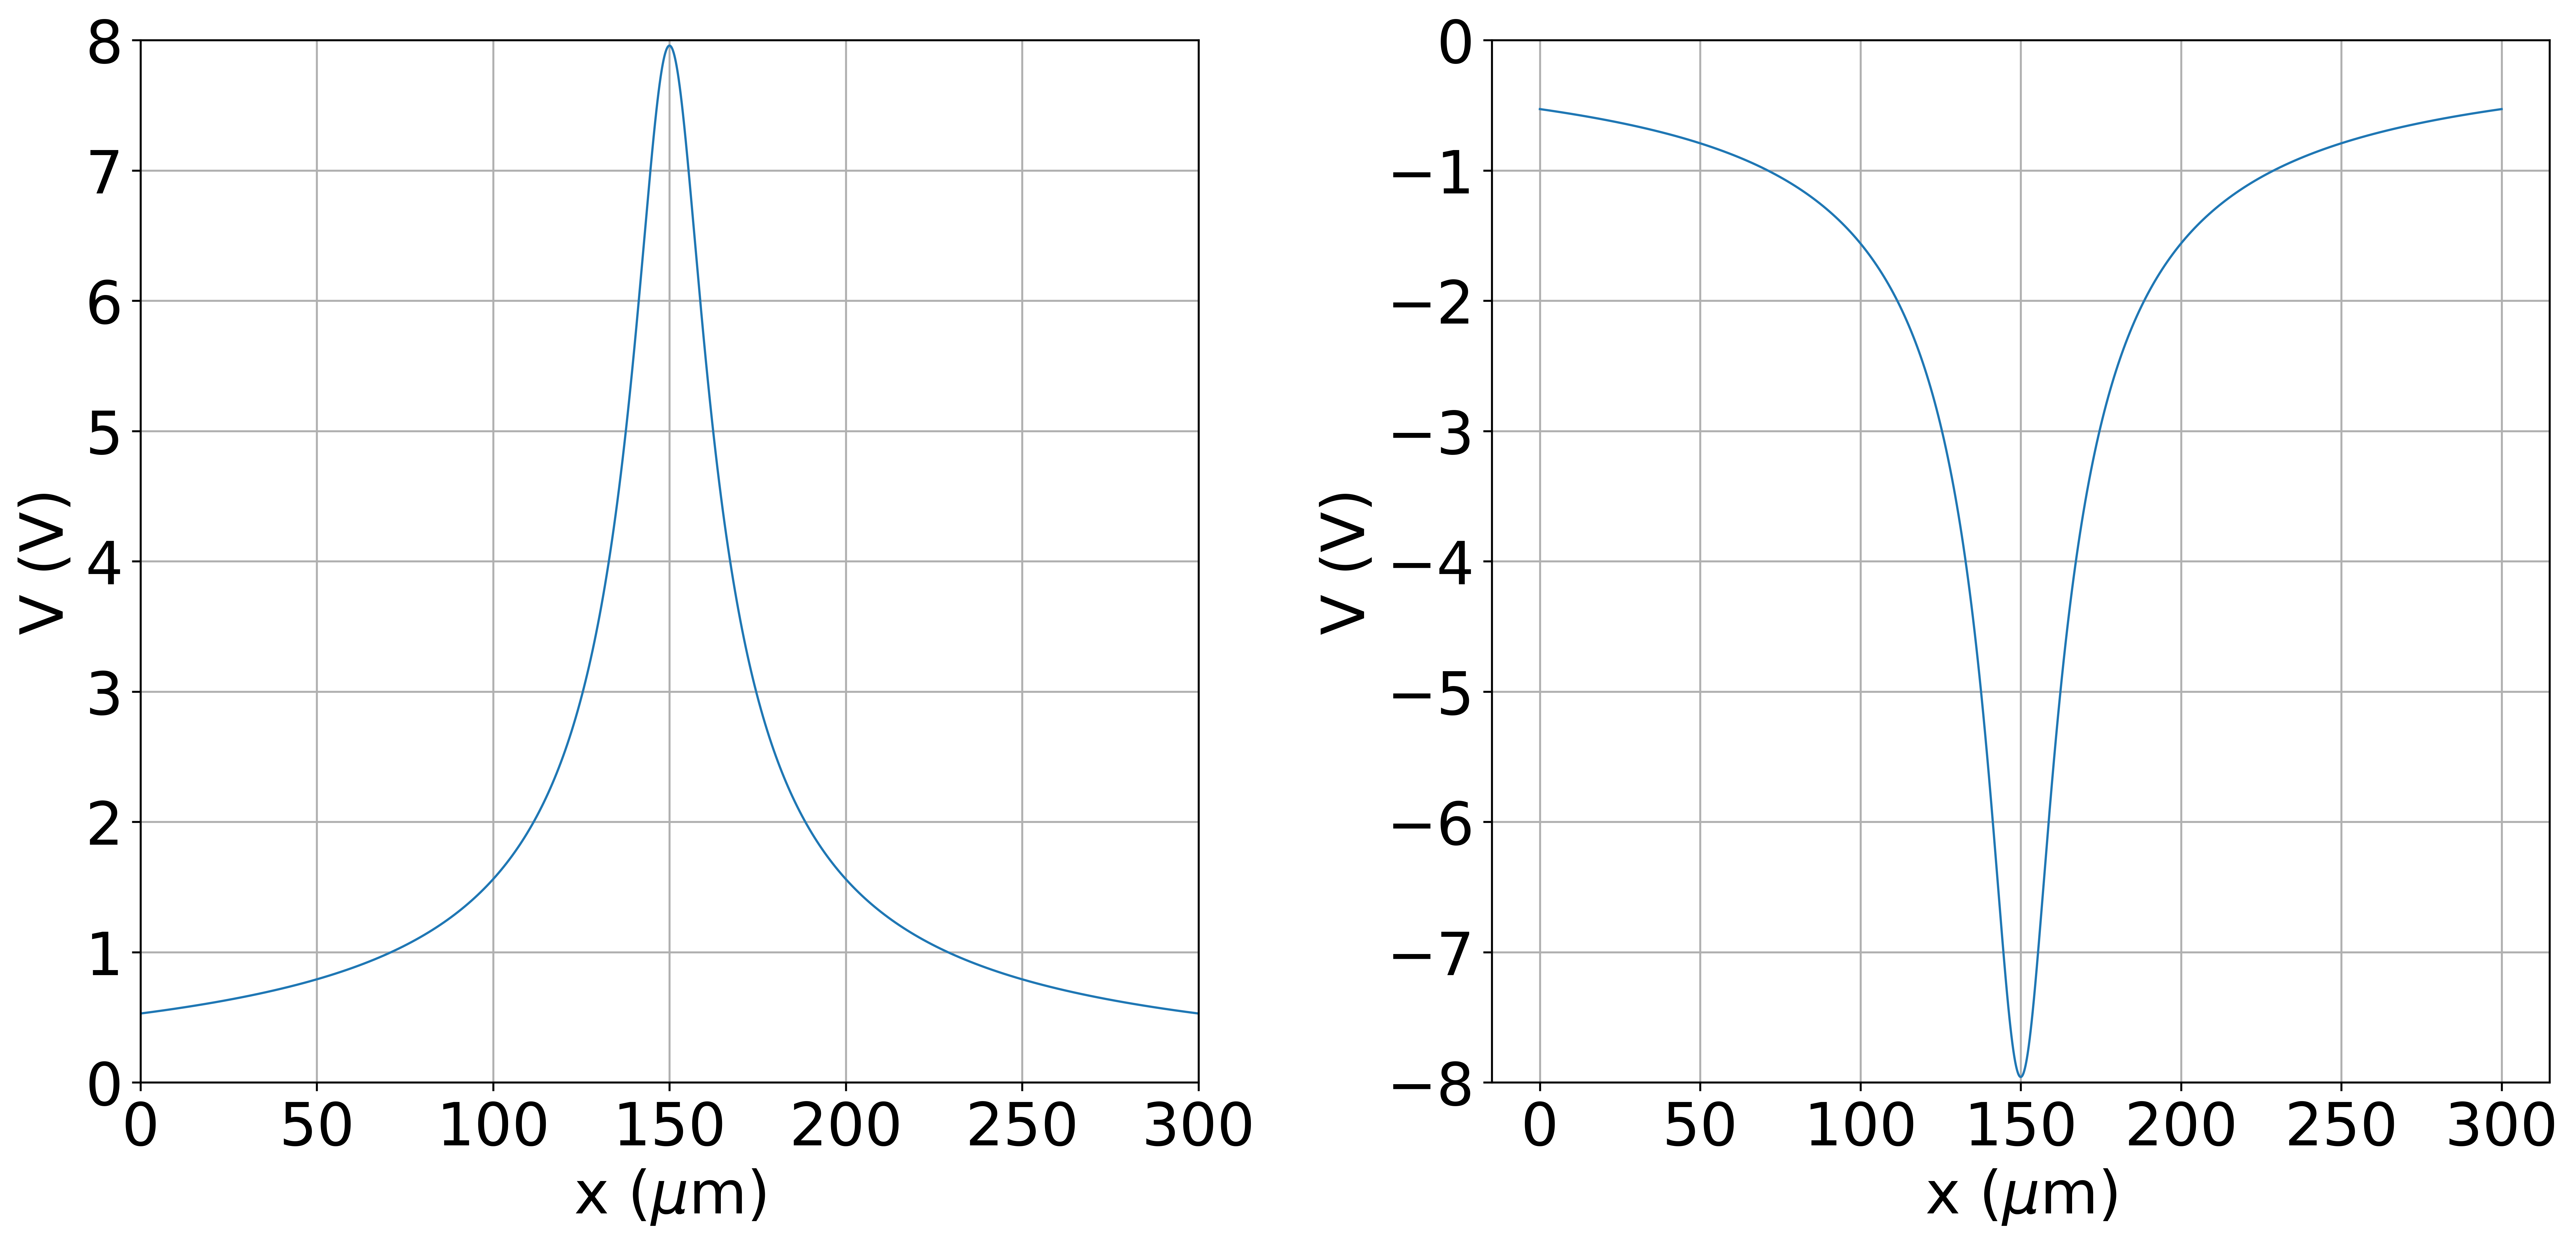

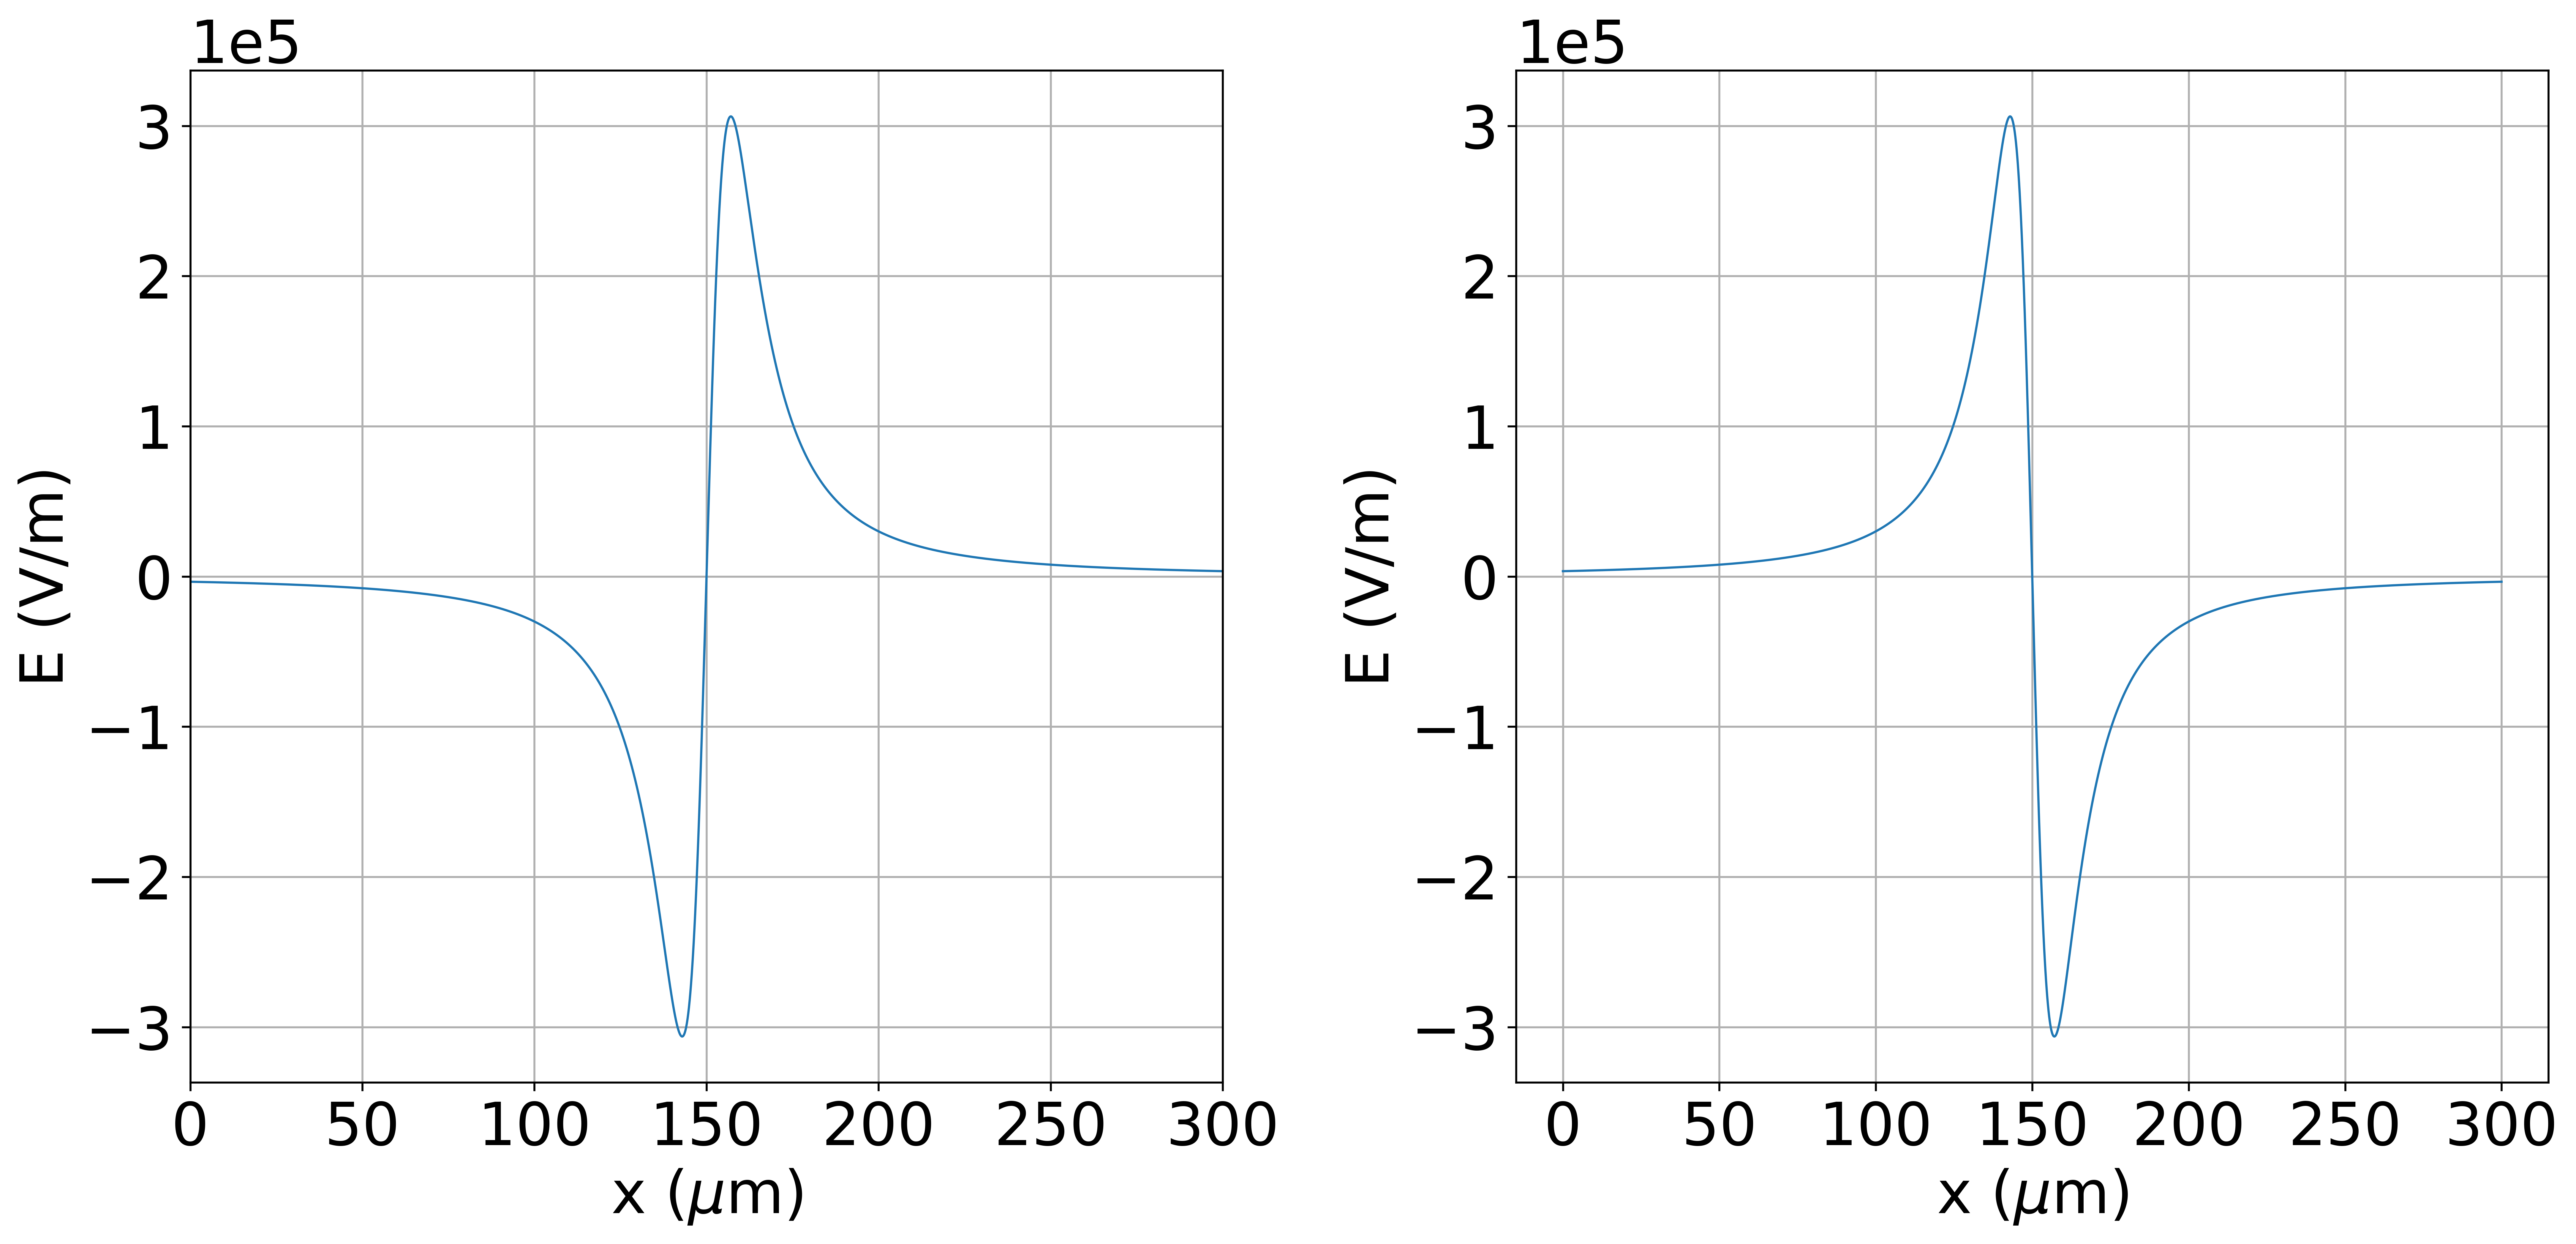

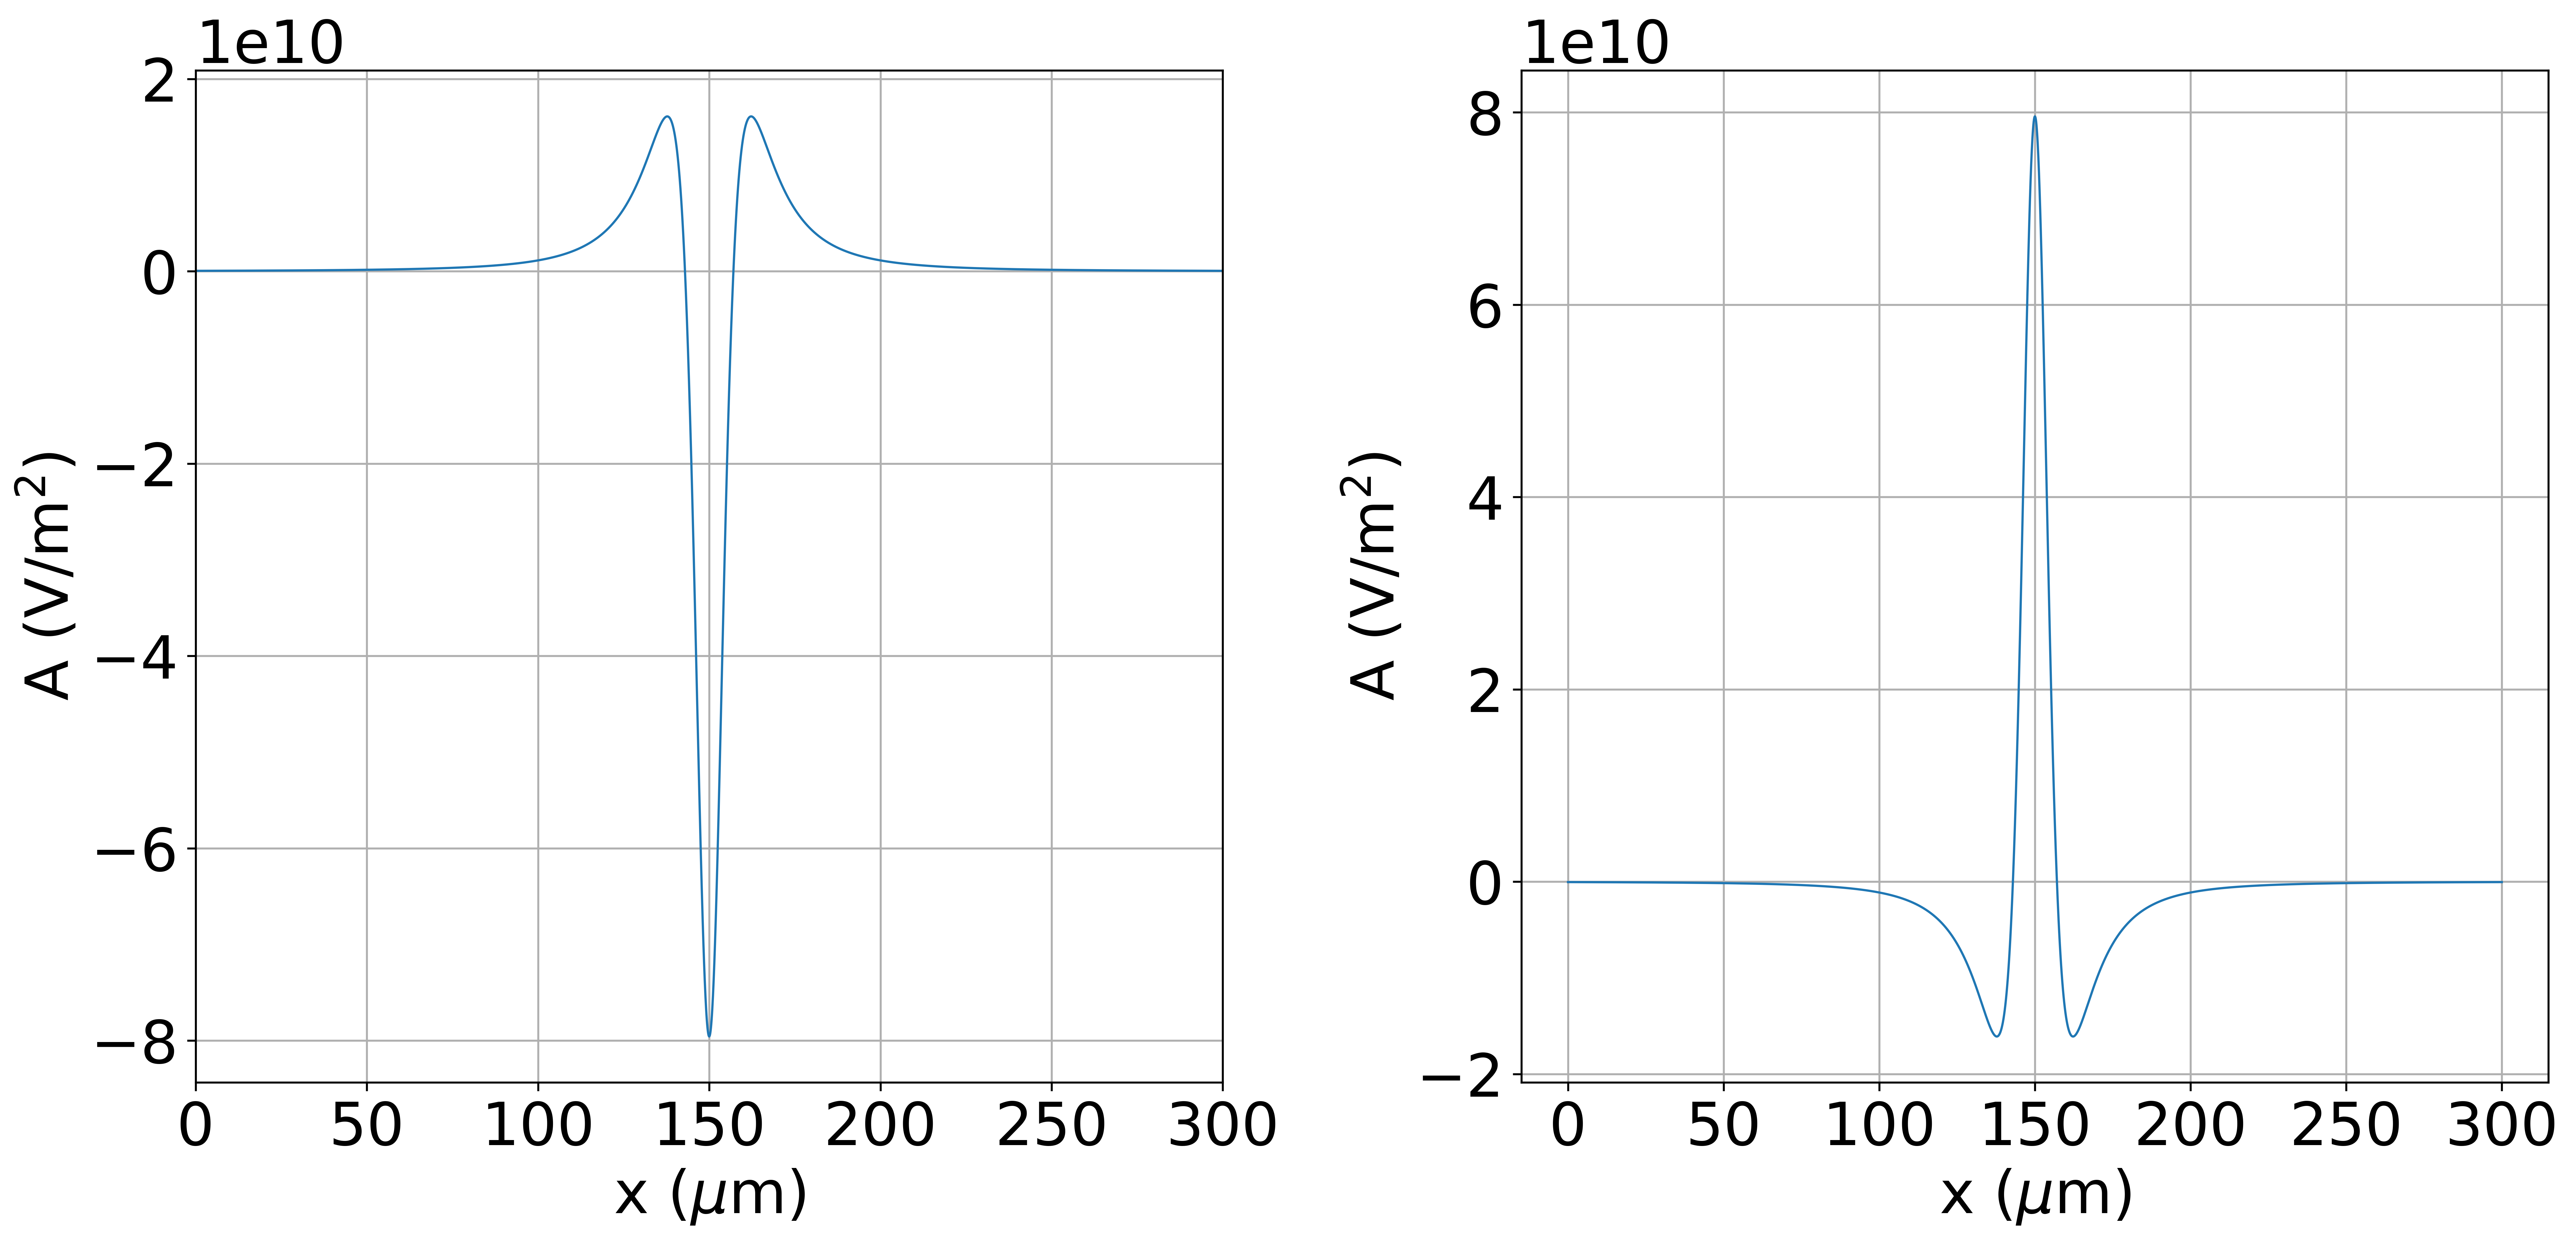

In [4]:
#constants:
I_act = 1e-3
rho_fluid= 1
d_0=10e-6
x_0=150e-6

x_vals= np.arange(0,300.1,0.1)*1e-6
print(x_vals.shape)

c=rho_fluid/(4*np.pi)

P = lambda x, I: c*(I/(np.sqrt(d_0**2+(x-x_0)**2)))
E = lambda x, I: (c*I*(-x_0+x))/(d_0**2+(x_0-x)**2)**(3/2)
A = lambda x, I: (c*I*(2*(x-x_0)**2-d_0**2))/(d_0**2+(x-x_0)**2)**(5/2)


def functions(function, Stim):
    F_p=[]
    F_n=[]
    for x in x_vals:
        f_p=function(x,Stim)
        F_p.append(f_p)
        f_n=function(x,(-Stim))
        F_n.append(f_n)
    return (np.array(F_p), np.array(F_n))
P_p, P_n = functions(P,I_act)
E_p, E_n = functions(E,I_act)
A_p, A_n = functions(A,I_act)

plt.rcParams["figure.figsize"] = [15,7.5]

fig1, axs1 = plt.subplots(1, 2)
axs1[0].plot(x_vals*1e6,P_p)
axs1[0].set_xlabel("x ($\\mu$m)")
axs1[0].set_xlim(0,300)
axs1[0].set_xticks(np.arange(0,350,50))
axs1[0].set_ylim(0,8)
axs1[0].set_ylabel("V (V)")
axs1[0].grid()

axs1[1].plot(x_vals*1e6,P_n)
axs1[1].set_xlabel("x ($\\mu$m)")
axs1[1].set_xticks(np.arange(0,350,50))
axs1[1].set_ylabel("V (V)")
axs1[1].set_ylim(-8,0)
axs1[1].grid()
plt.tight_layout()
plt.savefig("1Potential.pdf")

fig2, axs2 = plt.subplots(1, 2)
axs2[0].plot(x_vals*1e6, E_p)
axs2[0].set_xlabel("x ($\\mu$m)")
axs2[0].set_xlim(0, 300)
axs2[0].set_xticks(np.arange(0, 350, 50))
axs2[0].set_ylabel("E (V/m)")
axs2[0].ticklabel_format(axis="y", style= 'sci', scilimits=(0,0))
axs2[0].grid()

axs2[1].plot(x_vals*1e6, E_n)
axs2[1].set_xlabel("x ($\\mu$m)")
axs2[1].set_xticks(np.arange(0, 350, 50))
axs2[1].set_ylabel("E (V/m)")
axs2[1].ticklabel_format(axis="y", style= 'sci', scilimits=(0,0))
axs2[1].grid()
plt.tight_layout()
plt.savefig("2Efield.pdf")

fig3, axs3 = plt.subplots(1, 2)
axs3[0].plot(x_vals*1e6, A_p)
axs3[0].set_xlabel("x ($\\mu$m)")
axs3[0].set_xlim(0, 300)
axs3[0].set_xticks(np.arange(0, 350, 50))
#axs3[0].set_ylim(0, 8)
axs3[0].set_ylabel("A (V/m$^2$)")
axs3[0].grid()

axs3[1].plot(x_vals*1e6, A_n)
axs3[1].set_xlabel("x ($\\mu$m)")
axs3[1].set_xticks(np.arange(0, 350, 50))
axs3[1].set_ylabel("A (V/m$^2$)")
#axs3[1].set_ylim(-8, 0)
axs3[1].grid()
plt.tight_layout()
plt.savefig("3Afunction.pdf")

plt.show()

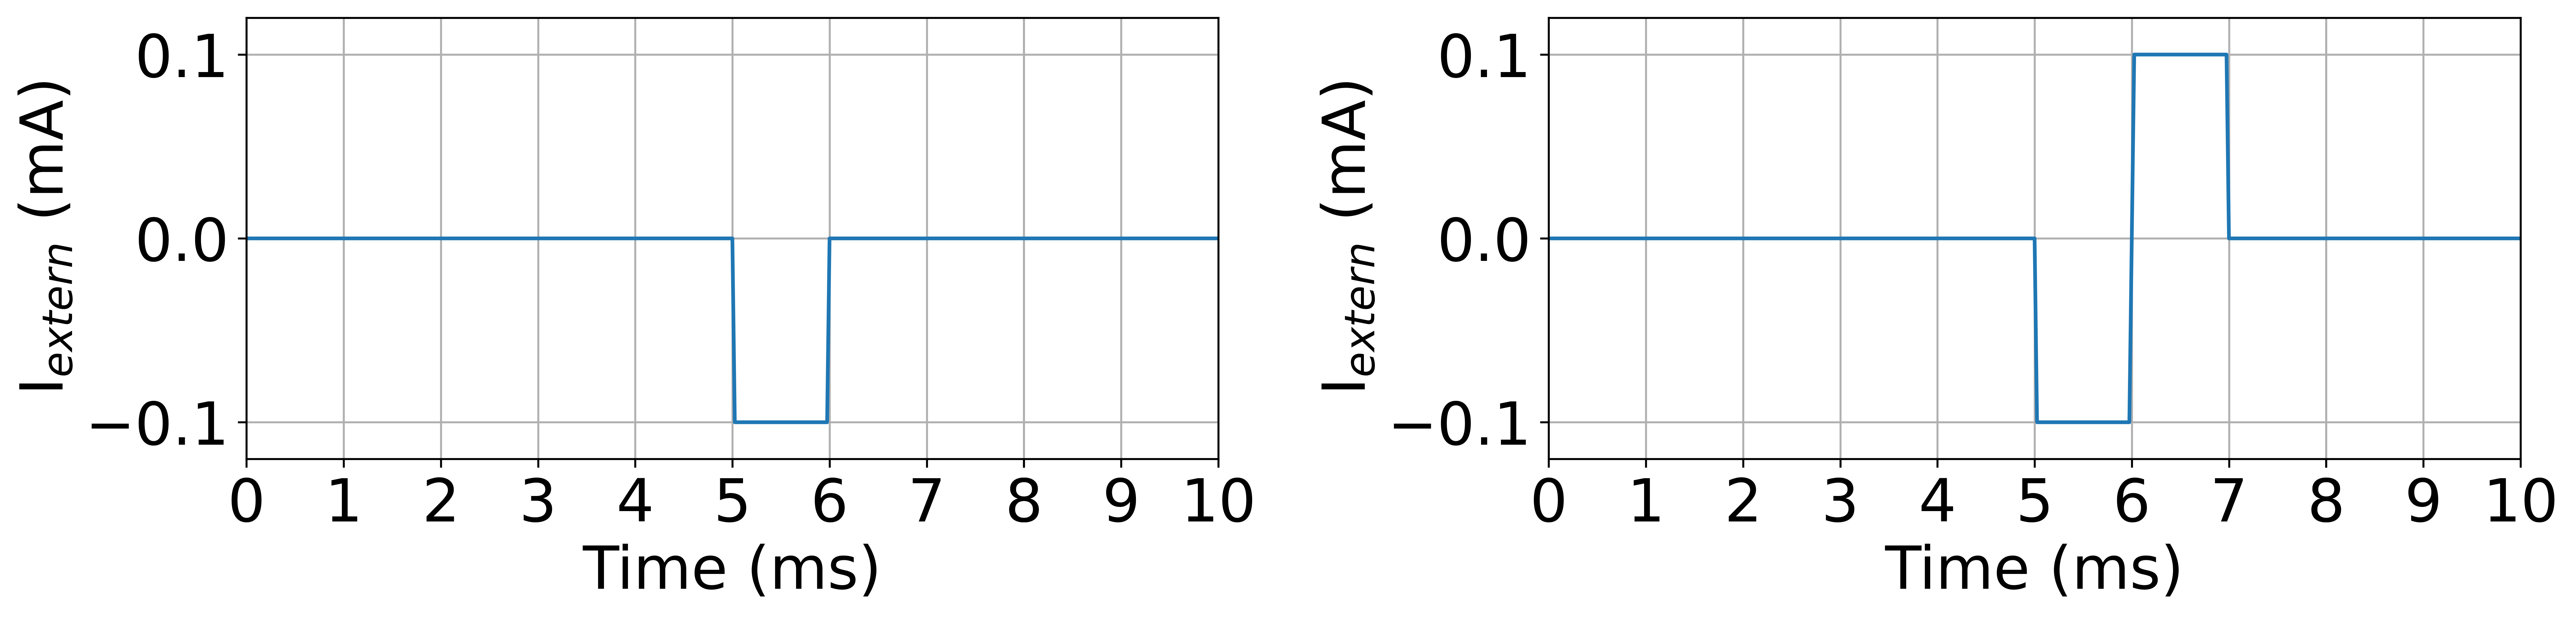

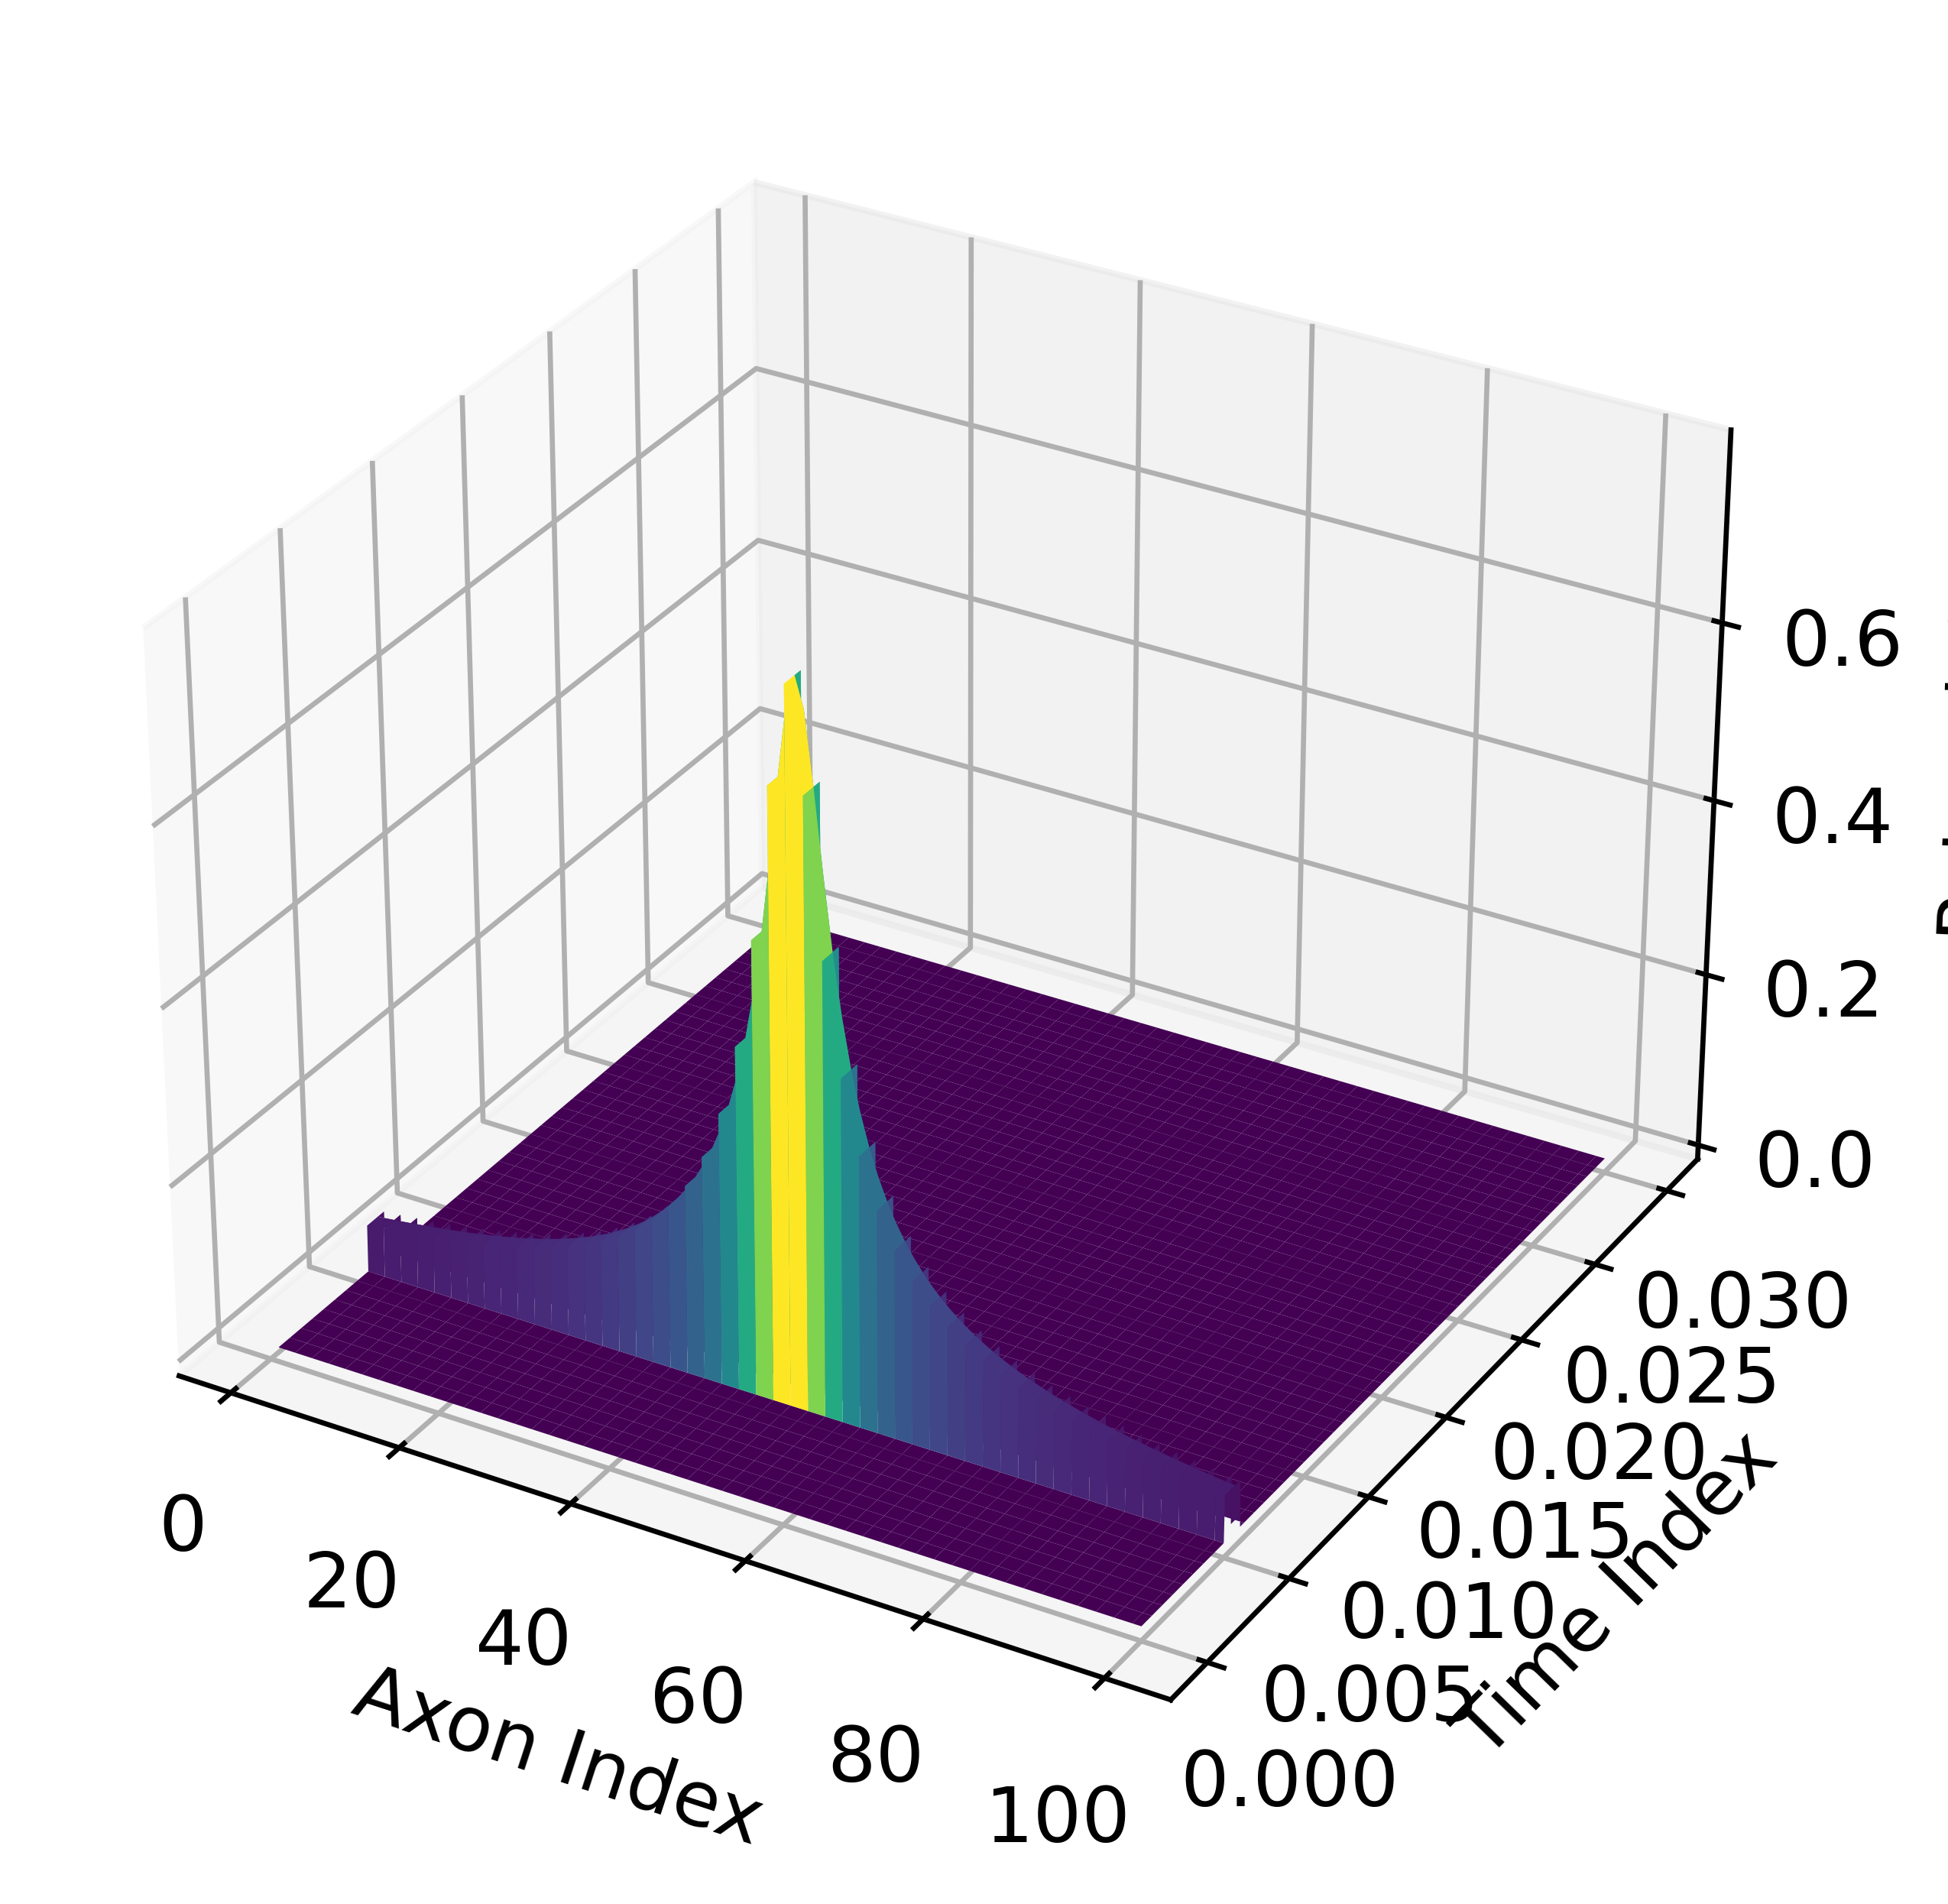

Fucnkts: (array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50], dtype=int64), array([201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239],
      dtype=int64))
V_ex_2: [0. 0. 0. ... 0. 0. 0.]
[0.0000e+00 2.5000e-05 5.0000e-05 ... 2.9950e-02 2.9975e-02 3.0000e-02]
t in ms: 5.025
pot. at com 50 at t in ms: 5.025 = -0.7957747154594768


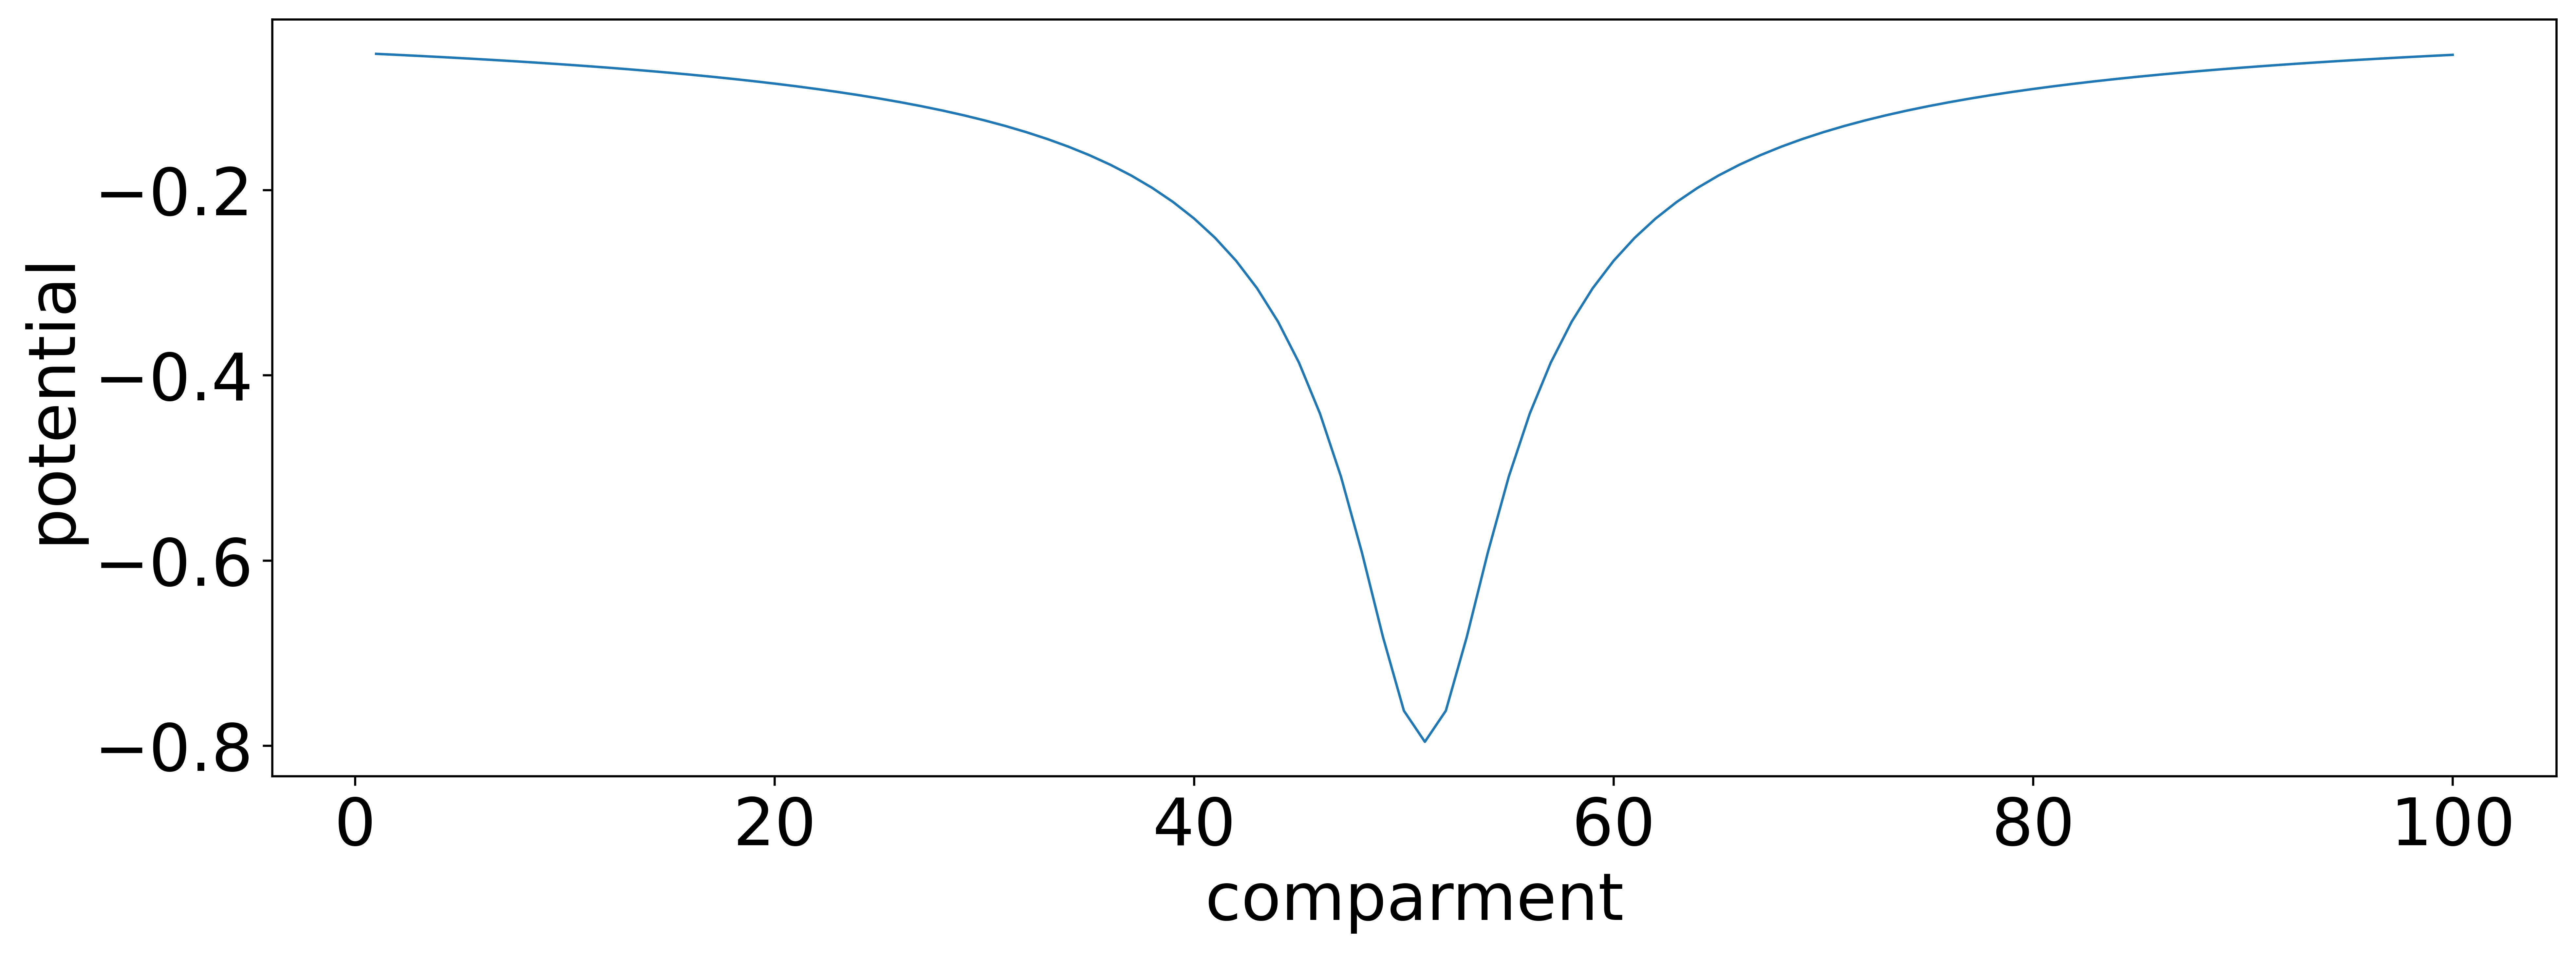

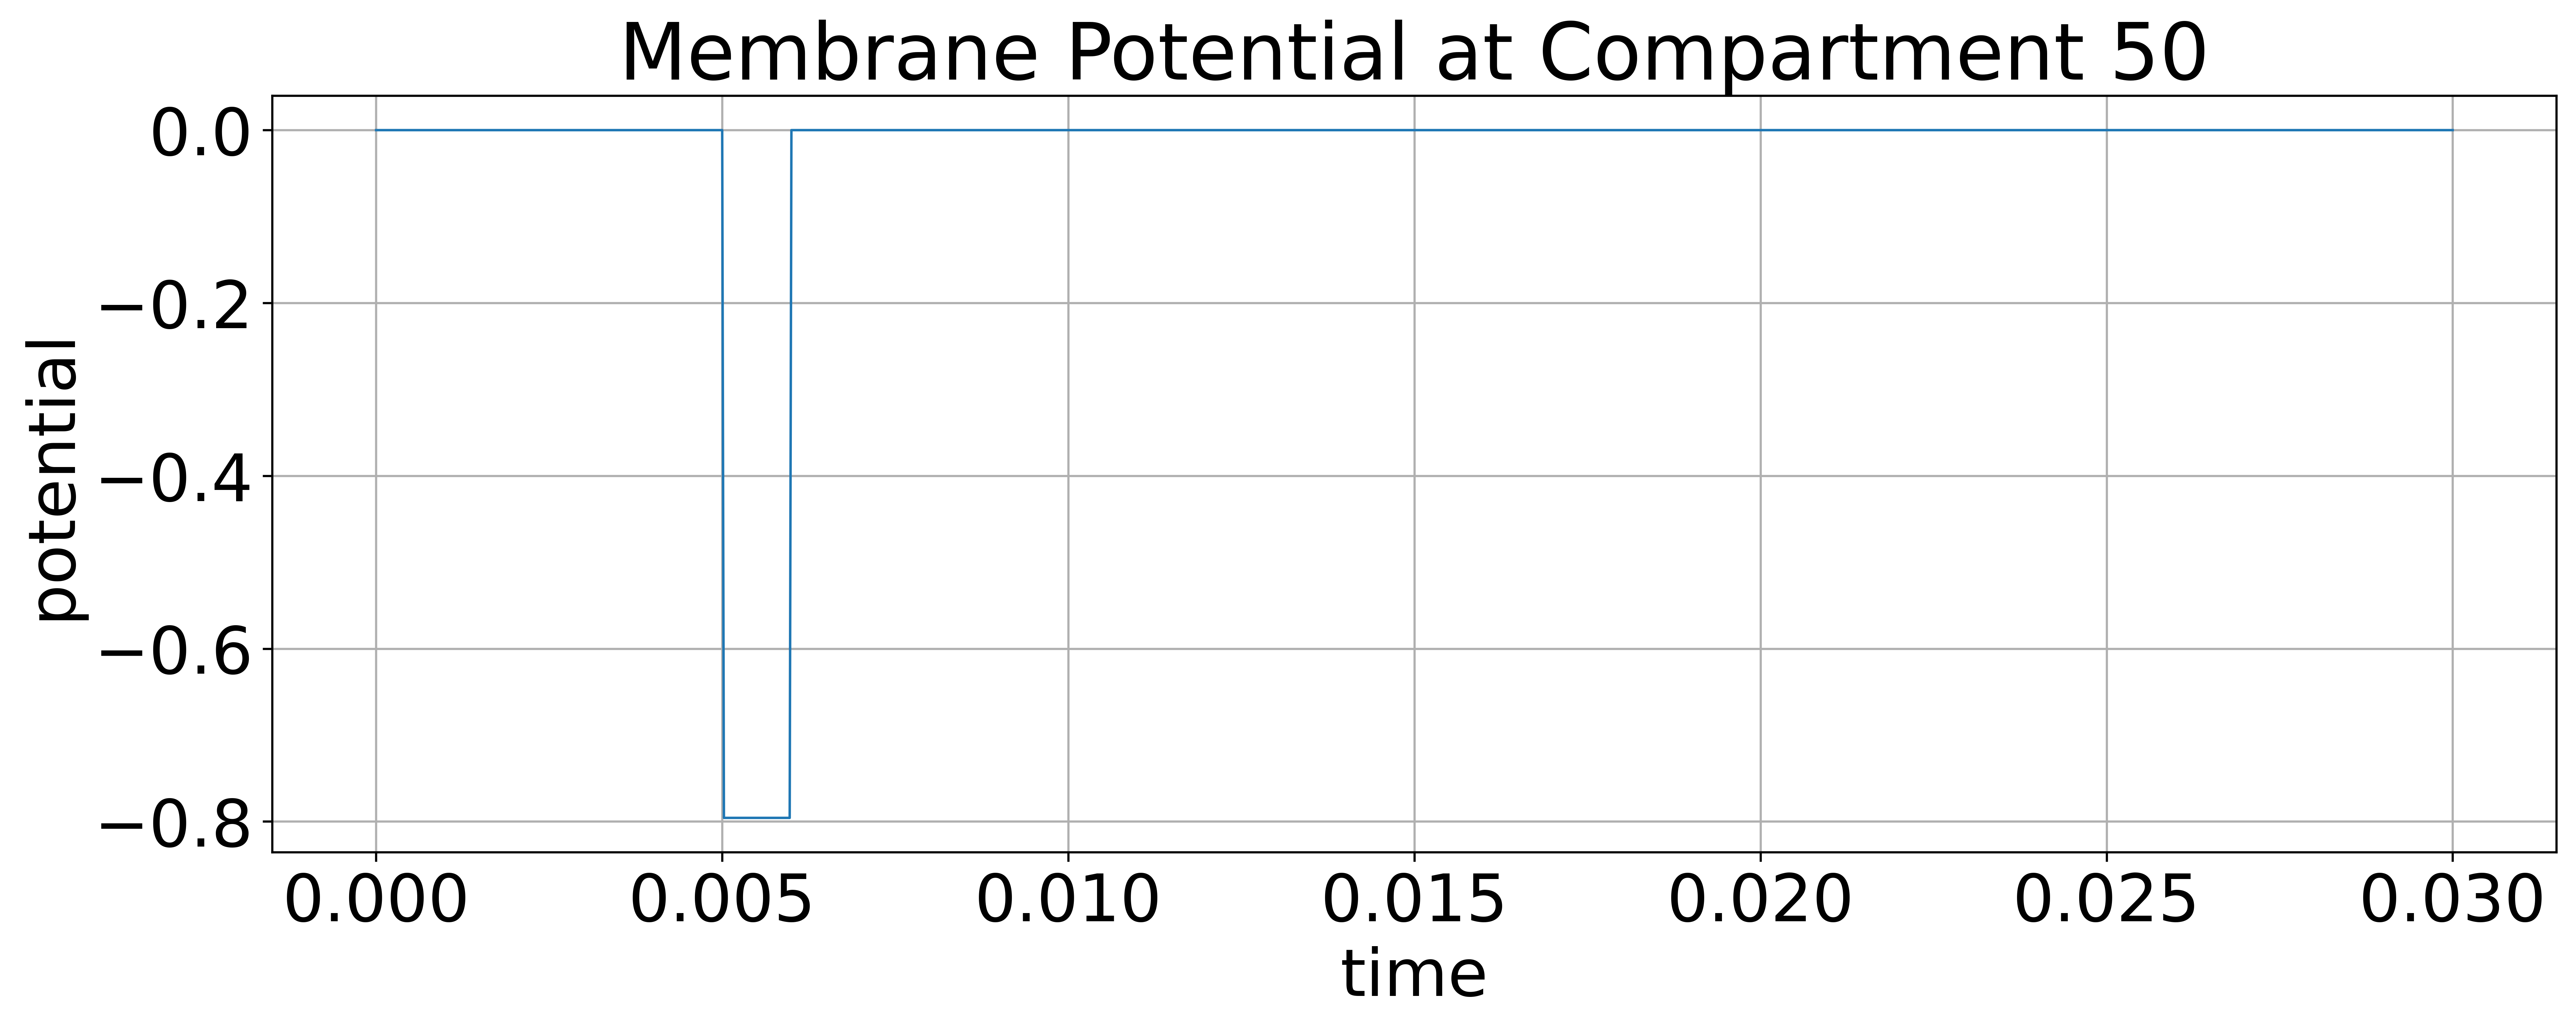

In [5]:
plt.rcParams["figure.figsize"] = [15,5]

#input currents:
I_stim_comp1 = np.zeros((num_axons, len(t)))
I_stim_comp2 = np.zeros((num_axons, len(t)))

pulsewidth = 1e-3
gapwidth = 0
offset= 5e-3 
comp_stim = [50]
def generate_pulse (pulses, comps):
    I_stim_comp=np.zeros((num_axons,len(t)))
    I_stim = np.zeros(len(t))
    for k in range(0,len(pulses)):
        for idx, i in enumerate(t):  
            if (i > (k*(gapwidth+pulsewidth))+offset) and (i < ((k*gapwidth + (k+1)*pulsewidth)+offset)):
                I_stim[idx] = pulses[k]
    for i in comps:
        I_stim_comp[i]=I_stim
    return I_stim_comp

Stim1 = generate_pulse([-0.05e-3],comp_stim)
Stim2 = generate_pulse([-0.1e-3],comp_stim)

Stim3 = generate_pulse([-0.1e-3,0.1e-3],comp_stim)
Stim4 = generate_pulse([-0.15e-3,0.15e-3],comp_stim)

Stim5 = generate_pulse([0.2e-3],comp_stim)
Stim6 = generate_pulse([0.4e-3],comp_stim)

plt.rcParams['lines.linewidth'] = 1.5
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].plot(t*1e3, Stim2[50]*1e3)
axs[0].set_xlim(0, 10)
axs[0].set_xticks([0,1,2,3,4,5,6,7,8,8,9,10])
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylim(-0.12,0.12)
axs[0].set_ylabel("I$_{extern}$ (mA)")
axs[0].grid(True)
axs[1].plot(t*1e3, Stim3[50]*1e3)
axs[1].set_xlim(0, 10)
axs[1].set_xticks([0,1,2,3,4,5,6,7,8,8,9,10])
axs[1].set_ylim(-0.12,0.12)
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel("I$_{extern}$ (mA)")
axs[1].grid(True)
plt.tight_layout()
plt.savefig("mono_bi.pdf")
plt.show()
plt.rcParams['lines.linewidth'] = 0.9
def calc_potential(Stimulus):
    V_ex = np.zeros((num_axons, len(t)))
    for T in range(len(t)):
        for c in range(num_axons):
    #for c, T in zip(range(num_axons),range(len(t))):
            V_ex[c, T] = P((c*l_axon), Stimulus[comp_stim, T])
    return V_ex

V_ex_1 = calc_potential(Stim1)
V_ex_2 = calc_potential(Stim2)
V_ex_3 = calc_potential(Stim3)
V_ex_4 = calc_potential(Stim4)
V_ex_5 = calc_potential(Stim5)
V_ex_6 = calc_potential(Stim6)


plt.rcParams.update({"font.size": 12})
T, C = np.meshgrid(t, np.arange(1,num_axons+1,1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(C, T, -V_ex_2, cmap='viridis')

ax.set_xlabel('Axon Index')
ax.set_ylabel('Time Index')
ax.set_zlabel('Potential')

plt.show()
plt.rcParams.update({"font.size": 24})
print(f"Fucnkts: { np.nonzero(P(50,Stim2))}") 
print(f"V_ex_2: {V_ex_2[50]}") 

axons_vals= np.arange(1,num_axons+1,1) 
print(t)
print(f"t in ms: {t[201]*1e3}")
print(f"pot. at com 50 at t in ms: {t[201]*1e3} = {V_ex_2[50,201]}")
plt.plot(axons_vals, V_ex_2[:,201])
plt.xlabel('comparment')
plt.ylabel('potential')
plt.show()

plt.plot(t, V_ex_2[50, :])
plt.xlabel('time')
plt.ylabel('potential')
plt.title('Membrane Potential at Compartment 50')
plt.grid(True)
plt.show()

In [6]:
alpha_m = lambda V , T: 1000*((2.5-100*V)/(np.exp(2.5-100*V)-1))*temp_corr(T)
alpha_m.__name__ = "m"
beta_m = lambda V, T: 4000*(np.exp((-500*V)/9))*temp_corr(T)

alpha_n = lambda V , T: 1000*((0.1-10*V)/(np.exp(1-100*V)-1))*temp_corr(T)
alpha_n.__name__ = "n"
beta_n = lambda V , T: 125*(np.exp((-25*V)/2))*temp_corr(T)

alpha_h = lambda V , T: 70*np.exp(-50*V)*temp_corr(T)
alpha_h.__name__ = "h"
beta_h = lambda V , T: 1000/(np.exp(3-100*V)+1)*temp_corr(T)

tau = lambda alpha, beta : 1/(alpha + beta)
x_inf = lambda alpha, beta : alpha/(alpha + beta)

alphas=[alpha_m,alpha_n,alpha_h]
betas=[beta_m,beta_n,beta_h]

In [7]:
def hh_gating(V, dt, curr_gate, T):

    new_gate_vec = []
    for V_s, gates in zip(V,curr_gate):
        new_gates = []
        for gate, a, b in zip(gates, alphas, betas):
            dx_dt = a(V_s, T) * (1 - gate) - b(V_s, T) * gate
            new_gate_x = gate + dx_dt * dt
            new_gates.append(new_gate_x)
        new_gate_vec.append(new_gates)
    
    return new_gate_vec

In [8]:
#connectionh matrix
C = np.zeros((num_axons, num_axons))
for i in range(num_axons-1):
    C[i, i + 1] = 1
    C[i + 1, i] = 1
for i in range(num_axons-2):
    C[i+1, i+1] = -2
C[0,0] = -1
C[num_axons-1,num_axons-1] = -1

In [9]:
def hh_potential(V, dt, I_ions, V_e):
    
    I_ion = np.sum(I_ions, axis=1)
    A = (np.identity(num_axons)- (dt/(C_m*R_a))*C)
    b = V+C@V_e*(dt/(C_m*R_a))+(dt/C_m)*(-1*I_ion)
    #print(f"current Ve:{V_e}")
    
    V_new = LA.solve(A, b)

    return V_new

In [10]:
V_ex=V_ex_2
def hh_model(t_end, dt, V_ex):
    #params
    gNa = 120*1e-3
    gK = 36*1e-3
    gL = 0.3*1e-3
    
    VNa = 115*1e-3
    VK = -12*1e-3
    VL = 10.6*1e-3
    
    V = np.zeros((num_axons,len(t)))
    
    #matrices
    gates = np.zeros((num_axons, 3, len(t)))
    I_ions = np.zeros((num_axons, 3, len(t)))
    

    # calculate the rates (alpha and beta) for initial voltage
    alphas_0=[]
    betas_0=[]
    for s in range(0,num_axons):
        alphas_0_s=[]
        betas_0_s=[]
        for a, b in zip(alphas,betas):
            a_0 = a(V[s][0],T1)
            b_0 = b(V[s][0],T1)
            alphas_0_s.append(a_0)
            betas_0_s.append(b_0)
        alphas_0.append(alphas_0_s)
        betas_0.append(betas_0_s)
        
    # steady-state equations to obtain the initial gating variable states
    x_0=[]
    for s in range(0,num_axons):
        x_0_s=[]
        for a, b in zip(alphas_0[s],betas_0[s]):
            x = x_inf(a,b)
            x_0_s.append(x)
        x_0.append(x_0_s)
    for s in range(0,num_axons):    
        for i in range(3):
            gates[s][i][0] = x_0[s][i]
    
    I_ions = np.zeros((num_axons, 3, len(t)))
    
    for i in range(len(t) - 1):
        # Calculate ionic currents for the current timestep
        I_ions[:, 0, i] = gNa * gates[:, 0, i]**3 * gates[:, 2, i] * (V[:, i] - VNa)
        I_ions[:, 1, i] = gK * gates[:, 1, i]**4 * (V[:, i] - VK)
        I_ions[:, 2, i] = gL * (V[:, i] - VL)
    
        # Calculate gating variables for a future timestep
        gates[:, :, i + 1] = hh_gating(V[:, i], dt, gates[:, :, i], T1)
    
        # Calculate membrane potential for a future timestep
        V[:, i + 1] = hh_potential(V[:, i], dt, I_ions[:, :, i], V_ex[:, i+1])
        # if i%10:    
        #     print(V[50,i])
    
    return V, t

In [11]:
#calc:
V1, t1 = hh_model( t_end, dt, V_ex_1)
V2, t2 = hh_model( t_end, dt, V_ex_2)
V3, t3 = hh_model( t_end, dt, V_ex_3)
V4, t4 = hh_model( t_end, dt, V_ex_4)
V5, t5 = hh_model( t_end, dt, V_ex_5)
V6, t6 = hh_model( t_end, dt, V_ex_6)

In [12]:
#plot:
plt.rcParams["figure.figsize"] = [15,17]
fig, ax1 = plt.subplots(3, 1)
comps = np.arange(1, num_axons + 1, 1)

img1 = ax1[0].pcolormesh(t1 * 1000, comps, V1 * 1000, cmap='jet', shading='auto', vmin=-20, vmax=120)
colorbar1 = plt.colorbar(img1, ax=ax1[0])
colorbar1.set_label('V (mV)')
img1.set_clim(-25, 105)
colorbar1.set_ticks(np.arange(-20, 120, 20))
ax1[0].set_xlabel('t (ms)')
ax1[0].invert_yaxis()
ax1[0].set_ylabel('Compartment Nr.')
ax1[0].set_xticks(np.arange(0,35,5))
ax1[0].set_yticks(np.arange(20,120,20))
ax1[0].set_title("Simulation 1")

img2 = ax1[1].pcolormesh(t2 * 1000, comps, V2 * 1000, cmap='jet', shading='auto')
colorbar2 = plt.colorbar(img2, ax=ax1[1])
colorbar2.set_label('V (mV)')
img2.set_clim(-25, 105)
colorbar2.set_ticks(np.arange(-20, 120, 20))
ax1[1].invert_yaxis()
ax1[1].set_xlabel('t (ms)')
ax1[1].set_ylabel('Compartment Nr.')
ax1[1].set_xticks(np.arange(0,35,5))
ax1[1].set_yticks(np.arange(20,120,20))
ax1[1].set_title("Simulation 2")


img3 = ax1[2].pcolormesh(t3 * 1000, comps, V3 * 1000, cmap='jet', shading='auto', vmin=-20, vmax=100)
colorbar3 = plt.colorbar(img3, ax=ax1[2])
colorbar3.set_label('V (mV)')
img3.set_clim(-25, 105)
colorbar3.set_ticks(np.arange(-20, 120, 20))
ax1[2].invert_yaxis()
ax1[2].set_xlabel('t (ms)')
ax1[2].set_ylabel('Compartment Nr.')
ax1[2].set_xticks(np.arange(0,35,5))
ax1[2].set_yticks(np.arange(20,120,20))
ax1[2].set_title("Simulation 3")

plt.tight_layout()
#plt.savefig("Simulation1_3.pdf")
plt.savefig("Simulation1_3.png")
plt.show()

fig2, ax2 = plt.subplots(3, 1)

img4 = ax2[0].pcolormesh(t4 * 1000, comps, V4 * 1000, cmap='jet', shading='auto', vmin=-20, vmax=100)
colorbar4 = plt.colorbar(img4, ax=ax2[0])
colorbar4.set_label('V (mV)')
img4.set_clim(-25, 105)
colorbar4.set_ticks(np.arange(-20, 120, 20))
ax2[0].invert_yaxis()
ax2[0].set_xlabel('t (ms)')
ax2[0].set_ylabel('Compartment Nr.')
ax2[0].set_xticks(np.arange(0, 35, 5))
ax2[0].set_yticks(np.arange(20, 120, 20))
ax2[0].set_title("Simulation 4")

img5 = ax2[1].pcolormesh(t5 * 1000, comps, V5 * 1000, cmap='jet', shading='auto', vmin=-20, vmax=100)
colorbar5 = plt.colorbar(img5, ax=ax2[1])
colorbar5.set_label('V (mV)')
img5.set_clim(-25, 105)
colorbar5.set_ticks(np.arange(-20, 120, 20))
ax2[1].invert_yaxis()
ax2[1].set_xlabel('t (ms)')
ax2[1].set_ylabel('Compartment Nr.')
ax2[1].set_xticks(np.arange(0, 35, 5))
ax2[1].set_yticks(np.arange(20, 120, 20))
ax2[1].set_title("Simulation 5")

img6 = ax2[2].pcolormesh(t6 * 1000, comps, V6 * 1000, cmap='jet', shading='auto', vmin=-20, vmax=100)
colorbar6 = plt.colorbar(img6, ax=ax2[2])
colorbar6.set_label('V (mV)')
img6.set_clim(-25, 105)
colorbar6.set_ticks(np.arange(-20, 120, 20))
ax2[2].invert_yaxis()
ax2[2].set_xlabel('t (ms)')
ax2[2].set_ylabel('Compartment Nr.')
ax2[2].set_xticks(np.arange(0, 35, 5))
ax2[2].set_yticks(np.arange(20, 120, 20))
ax2[2].set_title("Simulation 6")

plt.tight_layout()
#plt.savefig("Simulation4_6.pdf")
plt.savefig("Simulation4_6.png")
plt.show()